# Machine Learning Models using Python
This notebook outlines the designs we have used in our final prototype as well as in our alpha and beta prototype.

# Neural Network Models
---
The neural networks were our final design that we have chosen since they were more reliable than our alpha and beta prototype and could see how the datasets affected the final result.

## Neural Networks w/ Run 13 & 15 Data
This is supposed to simulate how a dataset of one circuit would predict the temperature curve of another dataset with two circuit breakers

### Run 13 vs. 15 using Run 13 as training data

Epoch 1/100
62/62 [==============================] - 1s 6ms/step - loss: 1065.0273 - mean_absolute_error: 32.1483 - val_loss: 711.9319 - val_mean_absolute_error: 26.3209
Epoch 2/100
62/62 [==============================] - 0s 3ms/step - loss: 459.2395 - mean_absolute_error: 20.7668 - val_loss: 249.5060 - val_mean_absolute_error: 15.1780
Epoch 3/100
62/62 [==============================] - 0s 3ms/step - loss: 140.3681 - mean_absolute_error: 10.8886 - val_loss: 71.3383 - val_mean_absolute_error: 7.3402
Epoch 4/100
62/62 [==============================] - 0s 3ms/step - loss: 39.7936 - mean_absolute_error: 5.1177 - val_loss: 25.9996 - val_mean_absolute_error: 3.7953
Epoch 5/100
62/62 [==============================] - 0s 3ms/step - loss: 19.9703 - mean_absolute_error: 3.1101 - val_loss: 19.5177 - val_mean_absolute_error: 2.8662
Epoch 6/100
62/62 [==============================] - 0s 3ms/step - loss: 13.2722 - mean_absolute_error: 2.2549 - val_loss: 11.8372 - val_mean_absolute_error: 2.2497

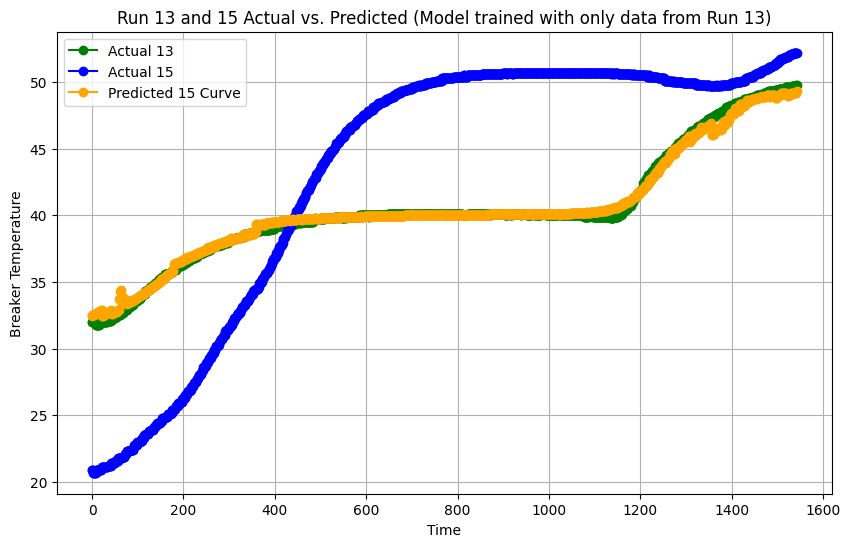

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

PATH_TO_DATA = '/content/Run_13_to_15_modfied.xlsx'

df_Run_13 = pd.read_excel(PATH_TO_DATA, sheet_name='Run 13')
df_Run_15 = pd.read_excel(PATH_TO_DATA, sheet_name='Run 15')

x_13 = df_Run_13[['Time','Ambient Temp','Load','Starting Temp']]
y_13 = df_Run_13[['Breaker Temp']]

x_15 = df_Run_15[['Time','Ambient Temp','Load','Starting Temp']]
y_15 = df_Run_15[['Breaker Temp']]

# Splitting Training, Validation, and Test Data
X_train_13, x_test_13, y_train_13,  y_test_13 = train_test_split(x_13, y_13, test_size=0.2)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train_13)
x_val_scaled = scaler.transform(x_test_13)
x_test_scaled = scaler.fit_transform(x_15)

# Create Neural Network Model
model = Sequential()
model.add(Dense(64, input_dim=4, activation='sigmoid'))  # Input layer with 4 features
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1))  # Output layer for regression

optimizer = tf.optimizers.Adam(learning_rate=.01)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

history = model.fit(x_train_scaled, y_train_13, validation_data=(x_val_scaled, y_test_13), epochs=100, batch_size=20, verbose=1, callbacks=[early_stopping])

# Evaluate the model on the test data
test_loss = model.evaluate(x_test_scaled, y_15)
print("Test Loss:", test_loss)

# Make predictions on the test data
y_pred = model.predict(x_test_scaled).flatten()

# First value of y_pred
first_pred_value = y_pred[0]

# First value of starting temperature in the test data
first_starting_temp = x_15.at[0, 'Starting Temp']

print("First predicted value:", first_pred_value)
print("First starting temperature:", first_starting_temp)
modifier = 0 #first_pred_value - first_starting_temp
print("modifier:", modifier)
y_modified = y_pred - modifier

# Plot actual vs. predicted breaker temperature values vs. time
plt.figure(figsize=(10, 6))
plt.plot(x_13['Time'], y_13, label='Actual 13', marker='o', linestyle='-', color='green')
plt.plot(x_15['Time'], y_15, label='Actual 15', marker='o', linestyle='-', color='blue')
plt.plot(x_15['Time'], y_modified, label='Predicted 15 Curve', marker='o', linestyle='-', color='orange')
plt.xlabel('Time')
plt.ylabel('Breaker Temperature')
plt.title('Run 13 and 15 Actual vs. Predicted (Model trained with only data from Run 13)')

plt.legend()
plt.grid(True)
plt.show()



### Run 13 vs. 15 using Run 15 as training data

Epoch 1/100
62/62 [==============================] - 2s 9ms/step - loss: 1321.2051 - mean_absolute_error: 34.7345 - val_loss: 800.1476 - val_mean_absolute_error: 26.1492
Epoch 2/100
62/62 [==============================] - 0s 6ms/step - loss: 575.8625 - mean_absolute_error: 21.8229 - val_loss: 332.5604 - val_mean_absolute_error: 16.1863
Epoch 3/100
62/62 [==============================] - 0s 4ms/step - loss: 225.9580 - mean_absolute_error: 13.7561 - val_loss: 120.0387 - val_mean_absolute_error: 9.7056
Epoch 4/100
62/62 [==============================] - 0s 5ms/step - loss: 75.7493 - mean_absolute_error: 7.5768 - val_loss: 39.2893 - val_mean_absolute_error: 5.4085
Epoch 5/100
62/62 [==============================] - 0s 5ms/step - loss: 26.4306 - mean_absolute_error: 4.4908 - val_loss: 16.8629 - val_mean_absolute_error: 3.5491
Epoch 6/100
62/62 [==============================] - 0s 5ms/step - loss: 11.3383 - mean_absolute_error: 2.9624 - val_loss: 6.6624 - val_mean_absolute_error: 2.3227

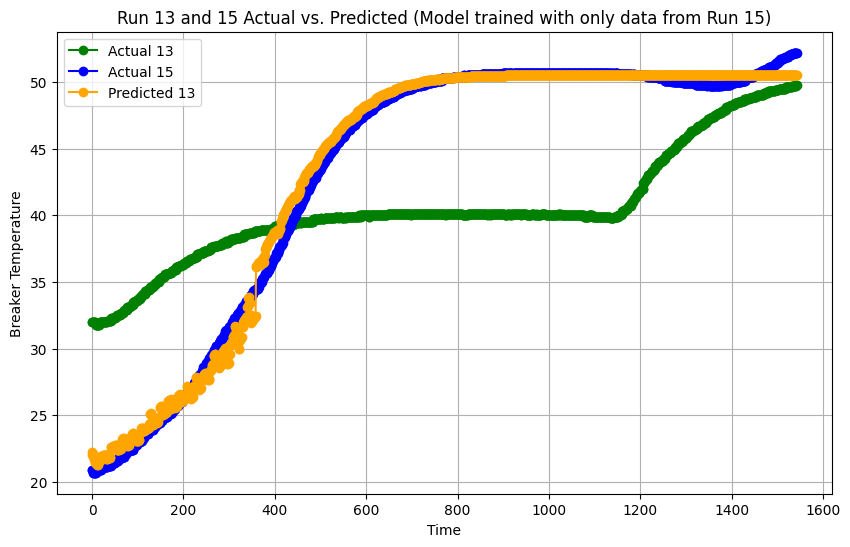

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

PATH_TO_DATA = '/content/sample_data/Run_13_to_15_modfied.xlsx'

df_Run_13 = pd.read_excel(PATH_TO_DATA, sheet_name='Run 13')
df_Run_15 = pd.read_excel(PATH_TO_DATA, sheet_name='Run 15')

x_13 = df_Run_13[['Time','Ambient Temp','Load','Starting Temp']]
y_13 = df_Run_13[['Breaker Temp']]

x_15 = df_Run_15[['Time','Ambient Temp','Load','Starting Temp']]
y_15 = df_Run_15[['Breaker Temp']]

# Splitting Training, Validation, and Test Data
X_train_15, x_test_15, y_train_15,  y_test_15 = train_test_split(x_15, y_15, test_size=0.2)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train_15)
x_val_scaled = scaler.transform(x_test_15)
x_test_scaled = scaler.fit_transform(x_13)

# Create Neural Network Model
model = Sequential()
model.add(Dense(64, input_dim=4, activation='sigmoid'))  # Input layer with 4 features
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1))  # Output layer for regression

optimizer = tf.optimizers.Adam(learning_rate=.01)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

history = model.fit(x_train_scaled, y_train_15, validation_data=(x_val_scaled, y_test_15), epochs=100, batch_size=20, verbose=1, callbacks=[early_stopping])

# Evaluate the model on the test data
test_loss = model.evaluate(x_test_scaled, y_13)
print("Test Loss:", test_loss)

# Make predictions on the test data
y_pred = model.predict(x_test_scaled).flatten()

# First value of y_pred
first_pred_value = y_pred[0]

# First value of starting temperature in the test data
first_starting_temp = x_13.at[0, 'Starting Temp']

print("First predicted value:", first_pred_value)
print("First starting temperature:", first_starting_temp)
modifier = 0 #first_pred_value - first_starting_temp
print("modifier:", modifier)
y_modified = y_pred - modifier

# Plot actual vs. predicted breaker temperature values vs. time
plt.figure(figsize=(10, 6))
plt.plot(x_13['Time'], y_13, label='Actual 13', marker='o', linestyle='-', color='green')
plt.plot(x_15['Time'], y_15, label='Actual 15', marker='o', linestyle='-', color='blue')
plt.plot(x_15['Time'], y_modified, label='Predicted 13', marker='o', linestyle='-', color='orange')
plt.xlabel('Time')
plt.ylabel('Breaker Temperature')
plt.title('Run 13 and 15 Actual vs. Predicted (Model trained with only data from Run 15)')
plt.legend()
plt.grid(True)
plt.show()



Run 13 vs. 15 using Run 13 as training data while isolating the load variable

Epoch 1/100
12/12 [==============================] - 2s 35ms/step - loss: 1840.8455 - mean_absolute_error: 42.7319 - val_loss: 1682.3182 - val_mean_absolute_error: 40.9065
Epoch 2/100
12/12 [==============================] - 0s 11ms/step - loss: 1493.9805 - mean_absolute_error: 38.5100 - val_loss: 1462.3739 - val_mean_absolute_error: 38.1242
Epoch 3/100
12/12 [==============================] - 0s 23ms/step - loss: 1298.4099 - mean_absolute_error: 35.8784 - val_loss: 1270.5355 - val_mean_absolute_error: 35.5193
Epoch 4/100
12/12 [==============================] - 0s 12ms/step - loss: 1117.1439 - mean_absolute_error: 33.2570 - val_loss: 1095.0381 - val_mean_absolute_error: 32.9565
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 957.3992 - mean_absolute_error: 30.7634 - val_loss: 941.6389 - val_mean_absolute_error: 30.5407
Epoch 6/100
12/12 [==============================] - 0s 10ms/step - loss: 816.9575 - mean_absolute_error: 28.3933 - val_loss: 806.1837 - val_me

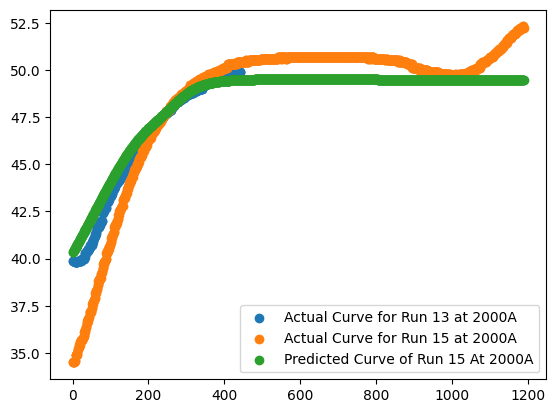

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

PATH_TO_DATA = '/content/sample_data/Run1315Split.xlsx'
PATH_TO_TEST = '/content/sample_data/Run1315Split.xlsx'

df_RUN_13_1500A = pd.read_excel(PATH_TO_DATA, sheet_name='1500Amps13')
df_RUN_13_2000A = pd.read_excel(PATH_TO_DATA, sheet_name='2000Amps13')
df_RUN_15_2000A = pd.read_excel(PATH_TO_DATA, sheet_name='2000Amps15')

# Extract Data from Columns
x_1500_13 = df_RUN_13_1500A[['Time','Ambient Temp','Load','Starting Temp']]
y_1500_13 = df_RUN_13_1500A[['Breaker Temp']]

x_2000_13 = df_RUN_13_2000A[['Time','Ambient Temp','Load','Starting Temp']]
y_2000_13 = df_RUN_13_2000A[['Breaker Temp']]

x_2000_15 = df_RUN_15_2000A[['Time','Ambient Temp','Load','Starting Temp']]
y_2000_15 = df_RUN_15_2000A[['Breaker Temp']]

# Splitting Training, Validation, and Test Data
X_train_2000_13, x_test_2000_13, y_train_2000_13,  y_test_2000_13 = train_test_split(x_2000_13, y_2000_13, test_size=0.2)
#X_train_1500_13, x_test_1500_13, y_train_1500_13,  y_test_1500_13 = train_test_split(x_1500_13, y_1500_13, test_size=0.2)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train_2000_13)
x_val_scaled = scaler.transform(x_test_2000_13)

# Create Neural Network Model
model = Sequential()
model.add(Dense(64, input_dim=4, activation='sigmoid'))  # Input layer with 4 features
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1))  # Output layer for regression

optimizer = tf.optimizers.Adam(learning_rate=.01)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

model.fit(x_train_scaled, y_train_2000_13, epochs=100, batch_size=32, validation_data=(x_val_scaled,y_test_2000_13))
#model.fit(X_train_1500_13, y_train_1500_13, epochs=50, batch_size=32)


# Testing and Evaluating Model Performance
test_loss, test_mae = model.evaluate(x_2000_15, y_2000_15)
print('Test MAE:', test_mae)

x_15_scaled = scaler.transform(x_2000_15)

plt.scatter(x_2000_13[['Time']],y_2000_13,label='Actual Curve for Run 13 at 2000A')
plt.scatter(x_2000_15[['Time']],y_2000_15,label='Actual Curve for Run 15 at 2000A')
y_pred_1 = model.predict(x_15_scaled)
plt.scatter(x_2000_15[['Time']],y_pred_1,label='Predicted Curve of Run 15 At 2000A')
plt.legend()
plt.show()


## Neural Networks w/ Larger Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the training data
df_train_data = pd.read_excel('/content/All_Data.xlsx')

# Separate features and target for training data
x_train_data = df_train_data[['Time', 'Ambient Temp', 'Load', 'Starting Temp']]
y_train_data = df_train_data['Breaker Temp']

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_data, y_train_data, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

# Create Neural Network Model
model = Sequential()
model.add(Dense(64, input_dim=4, activation='sigmoid'))  # Input layer with 4 features
model.add(Dense(32, activation='sigmoid'))  # Hidden layer with 32 neurons and ReLU activation function
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val), epochs=100, batch_size=15, verbose=1)

# Load the test data
df_test_data = pd.read_excel('/content/HalfTestDataNN.xlsx')

# Separate features and target for test data
x_test_data = df_test_data[['Time', 'Ambient Temp', 'Load', 'Starting Temp']]
y_test_data = df_test_data['Breaker Temp']

# Scale the features for test data
x_test_scaled = scaler.transform(x_test_data)

# Evaluate the model on the test data
test_loss = model.evaluate(x_test_scaled, y_test_data)
print("Test Loss:", test_loss)

# Make predictions on the test data
y_pred = model.predict(x_test_scaled).flatten()
# First value of y_pred
first_pred_value = y_pred[0]

# First value of starting temperature in the test data
first_starting_temp = df_test_data.at[0, 'Starting Temp']

print("First predicted value:", first_pred_value)
print("First starting temperature:", first_starting_temp)
modifier = first_pred_value - first_starting_temp
print("modifier:", modifier)
y_modified = y_pred - modifier
# Plot actual vs. predicted breaker temperature values vs. time
plt.figure(figsize=(10, 6))
plt.plot(df_test_data['Time'], y_test_data, label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(df_test_data['Time'], y_modified, label='Predicted', marker='o', linestyle='-', color='orange')
plt.xlabel('Time')
plt.ylabel('Breaker Temperature')
plt.title('Stabilization Dataset Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.show()

# Gradient Boosting
This was our beta prototype as our prior research showed that this machine learning model produced the  most accurate results for temperature prediction.

Mean Squared Error: 0.013273663694859763


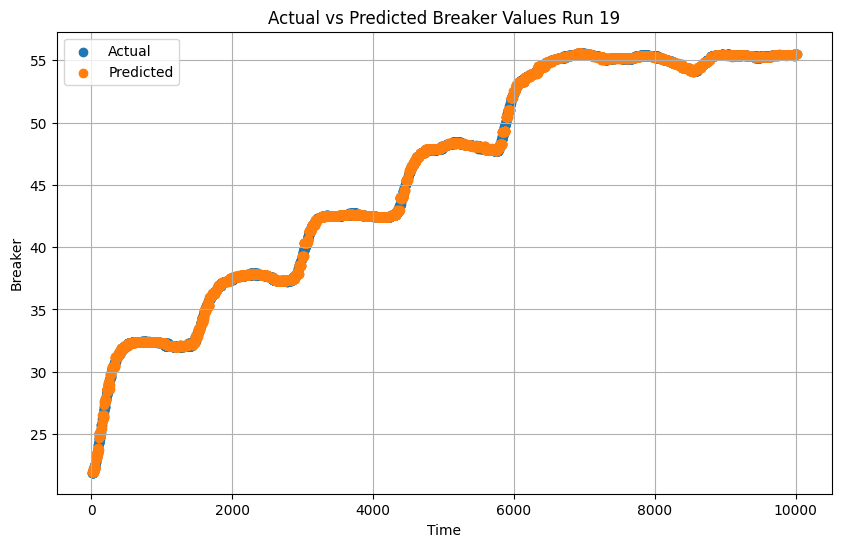

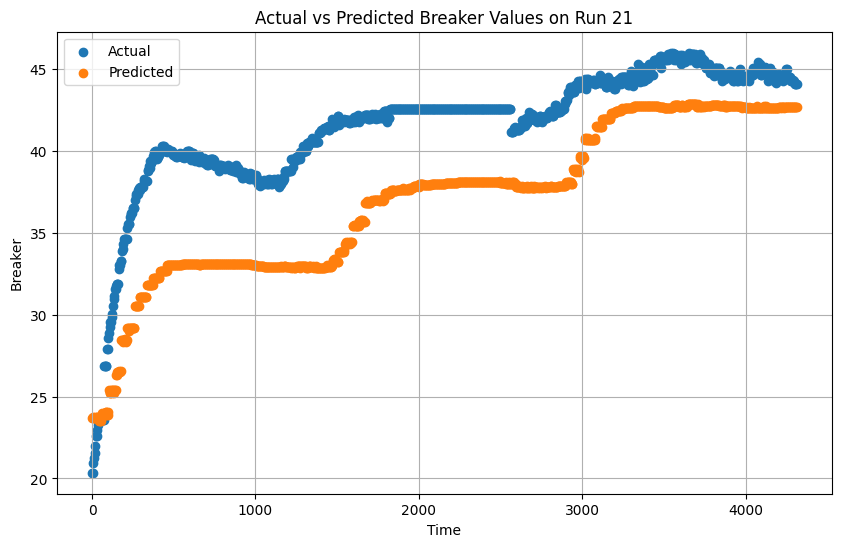

In [13]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel("/content/Run 19.xlsx")

# Split data into predictors (X) and target variable (y)
X = data[['Ambient', 'Load', 'Time']]
y = data['Breaker']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define the XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Set the index of y_test to time (assuming 'Time' column contains time values)
y_test.index = data.loc[y_test.index, 'Time']

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, label='Actual', marker='o')
plt.scatter(y_test.index, y_pred, label='Predicted', marker='o')
plt.xlabel('Time')
plt.ylabel('Breaker')
plt.title('Actual vs Predicted Breaker Values Run 19')
plt.legend()
plt.grid(True)
plt.show()


# Load the dataset
new_data = pd.read_excel("/content/VibDSB2o.xlsx")

# Split data into predictors (X_new) and target variable (y_new)
X_new = new_data[['Ambient', 'Load', 'Time']]
y_new = new_data['Breaker']

# Make predictions on the new dataset
y_pred_new = model.predict(X_new)

# Evaluate the model on the new dataset



# Set the index of y_new to time if applicable
# Assuming 'Time' column contains time values
if 'Time' in new_data.columns:
    y_new.index = new_data['Time']

# Plot actual vs predicted values for the new dataset
plt.figure(figsize=(10, 6))
plt.scatter(y_new.index, y_new, label='Actual', marker='o')
plt.scatter(y_new.index, y_pred_new, label='Predicted', marker='o')
plt.xlabel('Time')
plt.ylabel('Breaker')
plt.title('Actual vs Predicted Breaker Values on Run 21')
plt.legend()
plt.grid(True)
plt.show()


# Autoregression
This was our alpha prototype. We came up with this approach as it was the easiest way to perform temperature predictions.

                            OLS Regression Results                            
Dep. Variable:            temperature   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.142e+06
Date:                Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:15:06   Log-Likelihood:                 1749.0
No. Observations:                1390   AIC:                            -3492.
Df Residuals:                    1387   BIC:                            -3476.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0006      0.019  

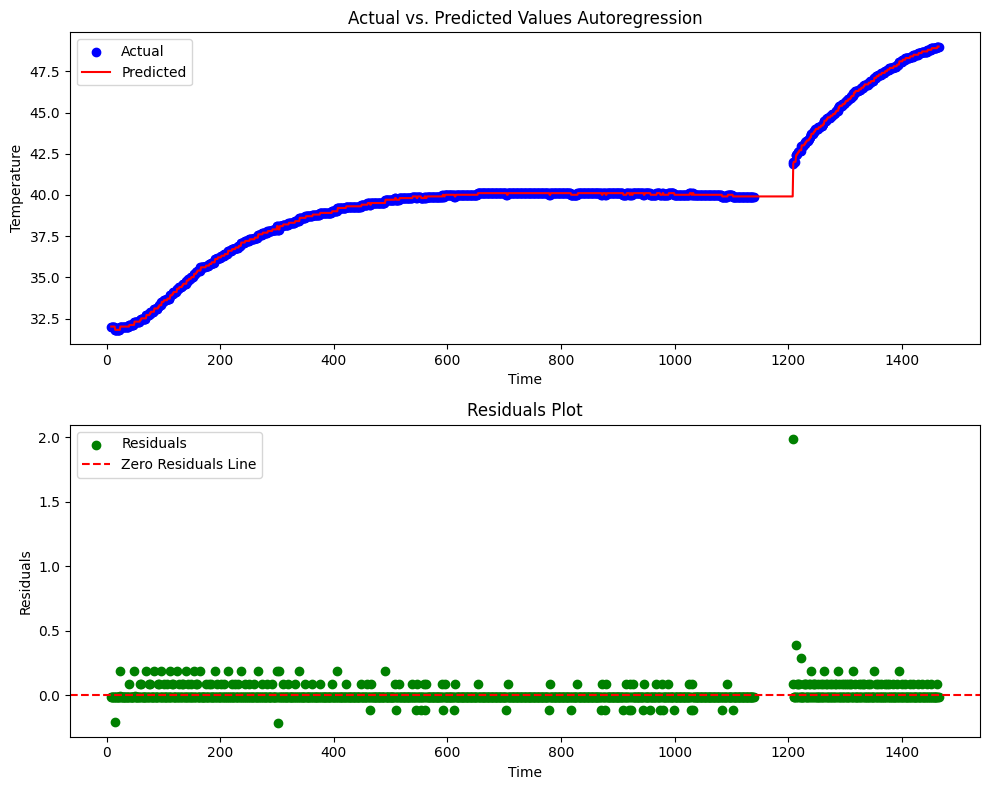

Sum of Squared Residuals (SSR): 6.570355405863378
Sum of Residuals: 3.3055584935937077e-09


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Read data from Excel file
data = pd.read_excel('cleaned_data.xlsx')

# Set lag order
lag_order = 2

# Create lagged variables for the temperature
for lag in range(1, lag_order + 1):
    data[f'temperature_lag{lag}'] = data['temperature'].shift(lag)

# Remove rows with NaN resulting from lagged variables
data = data.dropna()

# Set up the model
X = data[['temperature_lag1', 'temperature_lag2']]
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = data['temperature']

# Fit the autoregression model
model = sm.OLS(y, X)
results = model.fit()

# Print regression summary
print(results.summary())

import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(10, 8))

# Scatter plot of actual values
plt.subplot(2, 1, 1)
plt.scatter(data['time'], data['temperature'], label='Actual', color='blue')

# Line plot of predicted values
predicted_values = results.predict(X)

# Make sure 'time' and predicted values have the same length
min_length = min(len(data['time']), len(predicted_values))
plt.plot(data['time'][:min_length], predicted_values[:min_length], label='Predicted', color='red')
plt.title('Actual vs. Predicted Values Autoregression')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()

# Subplot for residuals
plt.subplot(2, 1, 2)
residuals = data['temperature'][:min_length] - predicted_values[:min_length]
time_for_residuals = data['time'][:min_length]  # Ensure both arrays have the same length

# Ensure residuals and time_for_residuals have the same length
min_length_residuals = min(len(time_for_residuals), len(residuals))
plt.scatter(time_for_residuals[:min_length_residuals], residuals[:min_length_residuals], label='Residuals', color='green')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals Line')
plt.title('Residuals Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

import numpy as np

# Assuming 'data' is your DataFrame and 'results' is the results object from your model

# Get the predicted values
predicted_values = results.predict(X)

# Calculate residuals
residuals = data['temperature'] - predicted_values

# Calculate SSR
ssr = np.sum(residuals**2)

print("Sum of Squared Residuals (SSR):", ssr)

# Assuming 'data' is your DataFrame and 'results' is the results object from your model

# Get the predicted values
predicted_values = results.predict(X)

# Calculate residuals
residuals = data['temperature'] - predicted_values

# Calculate the sum of residuals
sum_of_residuals = np.sum(residuals)

print("Sum of Residuals:", sum_of_residuals)



# Clustering
Our team looked into a couple of clustering methods to detect specific errors in the temperature curve.

## K-means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


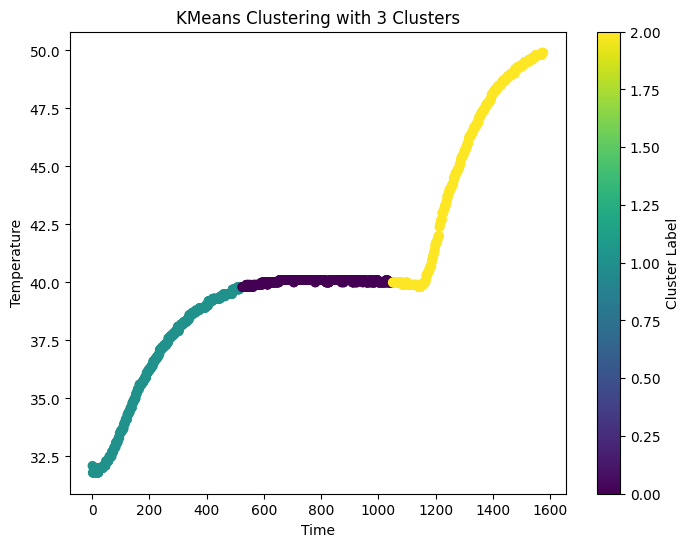

Number of clusters: 3


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the sample test file
data = pd.read_excel("/content/fullrun13.xlsx")

# Extract features from the data
X = data[['time2', 'temperature2']]

# Define the number of clusters
num_clusters = 3

# Fit KMeans model
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Get cluster labels
clusters = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['time2'], X['temperature2'], c=clusters, cmap='viridis')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('KMeans Clustering with {} Clusters'.format(num_clusters))
plt.colorbar(label='Cluster Label')
plt.show()

# Count the number of clusters
print("Number of clusters:", num_clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


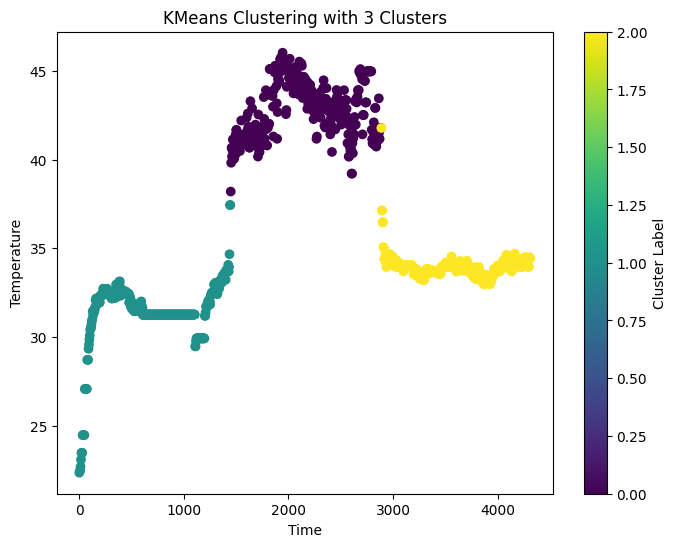

Number of clusters: 3


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the sample test file
data = pd.read_excel("/content/VibDSJ3.xlsx")

# Extract features from the data
X = data[['Time', 'Breaker']]

# Define the number of clusters
num_clusters = 3

# Fit KMeans model
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Get cluster labels
clusters = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['Time'], X['Breaker'], c=clusters, cmap='viridis')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('KMeans Clustering with {} Clusters'.format(num_clusters))
plt.colorbar(label='Cluster Label')
plt.show()

# Count the number of clusters
print("Number of clusters:", num_clusters)


## DBSCAN

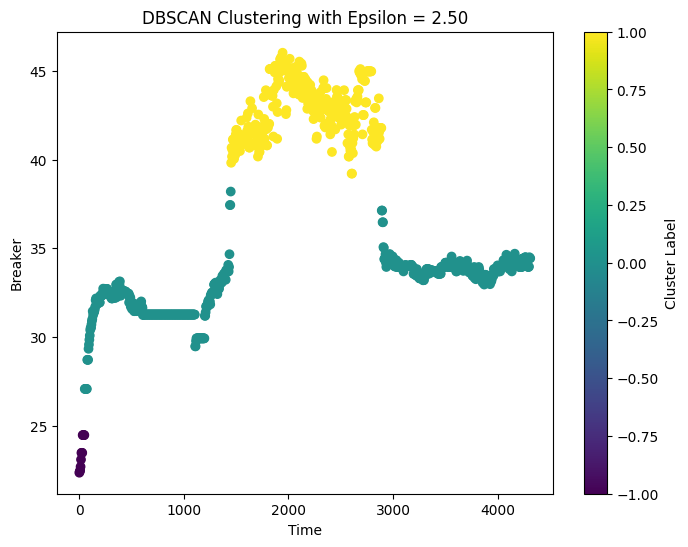

Number of clusters: 2


In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the VibDSJ3 dataset
data = pd.read_excel("/content/VibDSJ3.xlsx")

# Extract the temperature feature from the data
X = data[['Breaker']]  # Considering only the 'Breaker' feature

# Set epsilon to 1.0 degree
epsilon = 2.5

# Fit DBSCAN model
dbscan = DBSCAN(eps=epsilon, min_samples=40, metric='euclidean')  # Adjust min_samples as needed
clusters = dbscan.fit_predict(X)

# Visualize the clusters with both time and temperature
plt.figure(figsize=(8, 6))
plt.scatter(data['Time'], data['Breaker'], c=clusters, cmap='viridis')
plt.xlabel('Time')
plt.ylabel('Breaker')
plt.title('DBSCAN Clustering with Epsilon = {:.2f}'.format(epsilon))
plt.colorbar(label='Cluster Label')
plt.show()

# Count the number of clusters (excluding noise points)
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print("Number of clusters:", num_clusters)
